In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

In [39]:
df = pd.read_csv("cleaned_US_Accidents.csv", index_col=0)
df = df.drop('Weather_Condition', axis=1)


In [40]:
print(df.columns.tolist())

['Severity', 'State', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Weather_Condition_Score']


In [41]:
infrastructure = df.columns.tolist()[10:-1]
X = df[infrastructure]
y = df['Severity']

In [42]:
print(X.columns)

Index(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop'],
      dtype='object')


In [43]:
df.groupby('Traffic_Signal')['Severity'].value_counts(normalize=True)

Traffic_Signal  Severity
False           2           0.743692
                3           0.213286
                4           0.037185
                1           0.005837
True            2           0.869359
                3           0.088514
                1           0.022294
                4           0.019833
Name: proportion, dtype: float64

In [44]:
#one hot encoding
X = X.astype(int)

#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#train the model
rfc = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
rfc.fit(X_train, y_train)

print("OOB score:", rfc.oob_score_)

OOB score: 0.7631137824683862


In [45]:
#get the feature importances
importance = rfc.feature_importances_
feat_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)

print("Feature Importance:")
print(feat_importance)

Feature Importance:
Traffic_Signal     0.362943
Crossing           0.316643
Stop               0.129780
Station            0.073544
Junction           0.036590
Amenity            0.034700
Railway            0.025637
Traffic_Calming    0.005848
Give_Way           0.005753
No_Exit            0.005644
Bump               0.002407
Roundabout         0.000511
Turning_Loop       0.000000
dtype: float64


In [59]:
#finding if it's biased or not
# Take a 10% or 5% sample of X_test
X_test_small = X_test.sample(frac=0.50, random_state=42)
y_test_small = y_test.loc[X_test_small.index]

r = permutation_importance(rfc, X_test_small, y_test_small, n_repeats=10, random_state=42)

top = 0
featu_top = []
lib = {}
for name, imp in zip(X_test.columns, r.importances_mean):
    print(name, imp)
    lib[name] = imp
    if imp > top:
        top = imp
        featu_top = name

Amenity 4.0457002297999975e-05
Bump 7.282260413687958e-06
Crossing 0.00012865326730754356
Give_Way 1.4564520827287097e-05
Junction 0.00045716412596695787
No_Exit 6.715862381463378e-05
Railway -6.473120367668228e-05
Roundabout 0.0
Station -0.00012298928698573075
Stop 8.25322846878751e-05
Traffic_Calming 8.900540505607512e-06
Traffic_Signal 0.00011975272680198046
Turning_Loop 0.0


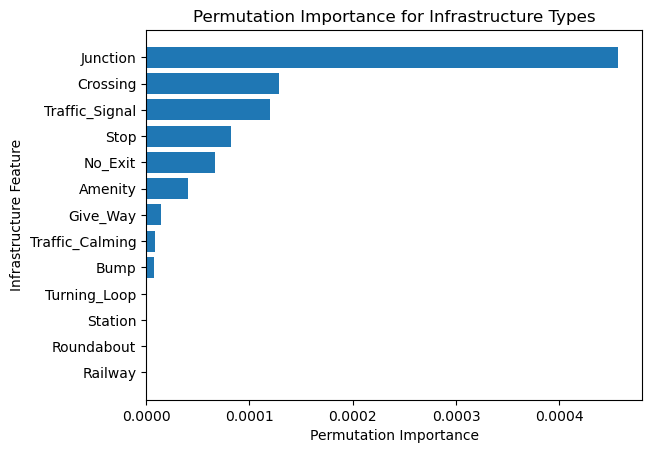

In [65]:
lib_nonneg = {k: max(0, v) for k, v in lib.items()}
sorted_items = sorted(lib_nonneg.items(), key=lambda x: x[1])
features, importances = zip(*sorted_items)

plt.barh(features, importances)
plt.title("Permutation Importance for Infrastructure Types")
plt.xlabel("Permutation Importance")
plt.ylabel("Infrastructure Feature")
plt.show()

In [47]:
print("Train accuracy:", rfc.score(X_train, y_train))
print("Test accuracy:", rfc.score(X_test, y_test))

Train accuracy: 0.7631609822407485
Test accuracy: 0.7641002196806337


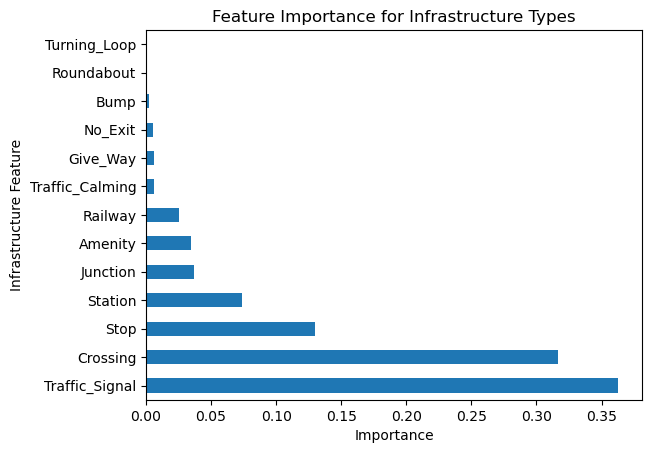

In [48]:
feat_importance.plot(kind='barh')
plt.title("Feature Importance for Infrastructure Types")
plt.xlabel("Importance")
plt.ylabel("Infrastructure Feature")
plt.show()

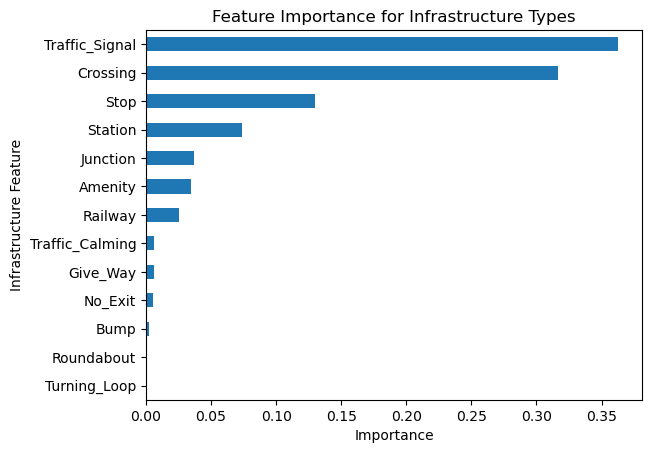

In [49]:
feat_importance[::-1].plot(kind='barh')
plt.title("Feature Importance for Infrastructure Types")
plt.xlabel("Importance")
plt.ylabel("Infrastructure Feature")
plt.show()